In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"norihisa","key":"d016ea67c3249f44d2090f6c16a2ade1"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!pip install kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c competitive-data-science-predict-future-sales

  0% 0.00/3.49k [00:00<?, ?B/s]
100% 3.49k/3.49k [00:00<00:00, 6.12MB/s]
  0% 0.00/1.50M [00:00<?, ?B/s]
100% 1.50M/1.50M [00:00<00:00, 49.1MB/s]
  0% 0.00/2.91k [00:00<?, ?B/s]
100% 2.91k/2.91k [00:00<00:00, 2.96MB/s]
  0% 0.00/469k [00:00<?, ?B/s]
100% 469k/469k [00:00<00:00, 146MB/s]
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 142MB/s]
  0% 0.00/12.9M [00:00<?, ?B/s]
100% 12.9M/12.9M [00:00<00:00, 119MB/s]


In [7]:
!ls

item_categories.csv  kaggle.json	 sample_data		   shops.csv
items.csv	     sales_train.csv.gz  sample_submission.csv.gz  test.csv.gz


In [0]:
!gunzip sales_train.csv.gz

In [0]:
!gunzip test.csv.gz

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

# データをデータフレームとして読み込む
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')
sales_train = pd.read_csv('sales_train.csv')
test = pd.read_csv('test.csv')

In [11]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [12]:
# item_category_nameは「大分類 – 小分類」のような構造になっているので、以下、” – “で文字列を分割
item_categories['big_category_name'] = item_categories['item_category_name'].map(lambda x: x.split(' - ')[0])
# 集約具合を確認
item_categories['big_category_name'].value_counts()

Книги                                13
Подарки                              12
Игровые консоли                       8
Игры                                  8
Аксессуары                            7
Программы                             6
Музыка                                6
Кино                                  5
Карты оплаты                          4
Игры PC                               4
Служебные                             2
Элементы питания                      1
Чистые носители (штучные)             1
Билеты (Цифра)                        1
Карты оплаты (Кино, Музыка, Игры)     1
PC                                    1
Чистые носители (шпиль)               1
Игры Android                          1
Доставка товара                       1
Игры MAC                              1
Name: big_category_name, dtype: int64

In [13]:
# Чистые носители (штучные),Чистые носители (шпиль)を一緒にする
item_categories.loc[
    item_categories['big_category_name']=='Чистые носители (штучные)',
    'big_categry'
] = 'Чистые носители (шпиль)'
# 再度集約具合を確認
item_categories['big_category_name'].value_counts()


Книги                                13
Подарки                              12
Игровые консоли                       8
Игры                                  8
Аксессуары                            7
Программы                             6
Музыка                                6
Кино                                  5
Карты оплаты                          4
Игры PC                               4
Служебные                             2
Элементы питания                      1
Чистые носители (штучные)             1
Билеты (Цифра)                        1
Карты оплаты (Кино, Музыка, Игры)     1
PC                                    1
Чистые носители (шпиль)               1
Игры Android                          1
Доставка товара                       1
Игры MAC                              1
Name: big_category_name, dtype: int64

In [14]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [15]:
# shop_nameからcity_name(都市名)を抽出
shops['city_name'] = shops['shop_name'].map(lambda x: x.split(' ')[0])
# 集約具合を確認
shops['city_name'].value_counts()

Москва              13
Тюмень               3
РостовНаДону         3
Воронеж              3
Красноярск           2
Новосибирск          2
СПб                  2
Жуковский            2
!Якутск              2
Якутск               2
Уфа                  2
Н.Новгород           2
Самара               2
Казань               2
Мытищи               1
Омск                 1
Выездная             1
Интернет-магазин     1
Коломна              1
Сергиев              1
Сургут               1
Ярославль            1
Адыгея               1
Волжский             1
Томск                1
Балашиха             1
Курск                1
Калуга               1
Химки                1
Чехов                1
Цифровой             1
Вологда              1
Name: city_name, dtype: int64

In [16]:
# 表記揺れの統一
shops.loc[shops['city_name']=='!Якутск','city_name'] = 'Якутск'
# 再度集約具合を確認
shops['city_name'].value_counts()

Москва              13
Якутск               4
Тюмень               3
РостовНаДону         3
Воронеж              3
Уфа                  2
СПб                  2
Жуковский            2
Новосибирск          2
Красноярск           2
Самара               2
Н.Новгород           2
Казань               2
Мытищи               1
Омск                 1
Выездная             1
Адыгея               1
Коломна              1
Сергиев              1
Интернет-магазин     1
Ярославль            1
Химки                1
Волжский             1
Томск                1
Балашиха             1
Сургут               1
Курск                1
Калуга               1
Чехов                1
Цифровой             1
Вологда              1
Name: city_name, dtype: int64

In [0]:
# 日次売り上げ額
sales_train['date_sales'] = sales_train['item_cnt_day'] * sales_train['item_price']


In [0]:
# 日次集計から月次集計に変換

# 月次shop_id*item_id別売上点数
mon_shop_item_cnt = sales_train[
    ['date_block_num','shop_id','item_id','item_cnt_day']
    ].groupby(
              ['date_block_num','shop_id','item_id'],
               as_index=False
              ).sum().rename(columns={'item_cnt_day':'mon_shop_item_cnt'})

# 月次shop_id*item_id別売上金額
mon_shop_item_sales = sales_train[
    ['date_block_num','shop_id','item_id','date_sales']
].groupby(
    ['date_block_num','shop_id','item_id'],
    as_index=False
).sum().rename(columns={'date_sales':'mon_shop_item_sales'})

In [0]:
# テストデータの組み合わせに学習データをトリム

In [0]:
# 学習データセットをフルに拡張
# 34月*shop_id*item_id
train_full_comb = pd.DataFrame()
for i in range(35):
    mid = test[['shop_id','item_id']]
    mid['date_block_num'] = i
    train_full_comb = pd.concat([train_full_comb,mid],axis=0)

In [0]:
train = pd.merge(
    train_full_comb,
    mon_shop_item_cnt,
    on=['date_block_num','shop_id','item_id'],
    how='left'
)
# 月次売上金額
train = pd.merge(
    train,
    mon_shop_item_sales,
    on=['date_block_num','shop_id','item_id'],
    how='left'
)
# 学習データにマスタをマージ
# item_idのjoin
train = pd.merge(
    train,
    items[['item_id','item_category_id']],
    on='item_id',
    how='left'
)
# item_categry_idのjoin
train = pd.merge(
    train,
    item_categories[['item_category_id','big_category_name']],
    on='item_category_id',
    how='left'
)
# shop_idのjoin
train = pd.merge(
    train,
    shops[['shop_id','city_name']],
    on='shop_id',
    how='left'
)

## データの可視化

Text(0.5, 1.0, 'Montly item counts')

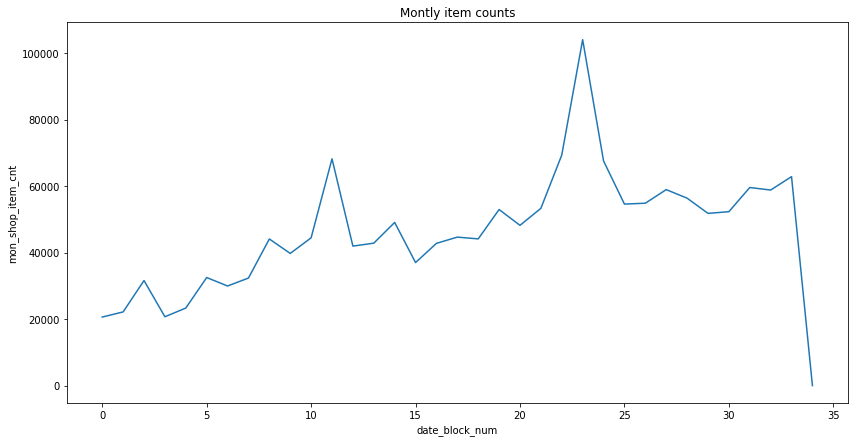

In [29]:
plt_df = train.groupby(
    ['date_block_num'],
    as_index=False
).sum()
plt.figure(figsize=(14, 7))
sns.lineplot(x='date_block_num',y='mon_shop_item_cnt',data=plt_df)
plt.title('Montly item counts')

Text(0.5, 1.0, 'Montly item counts by big category')

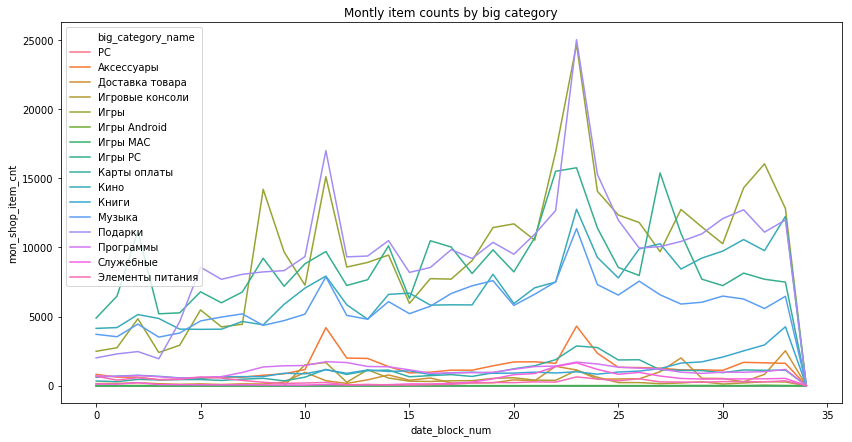

In [30]:
# セグメント別に月次商品売上数を可視化
plt_df = train.groupby(
    ['date_block_num','big_category_name'],
    as_index=False
).sum()
plt.figure(figsize=(14, 7))
sns.lineplot(x='date_block_num',y='mon_shop_item_cnt',data=plt_df,hue='big_category_name')
plt.title('Montly item counts by big category')

Text(0.5, 1.0, 'Montly item counts by city_name')

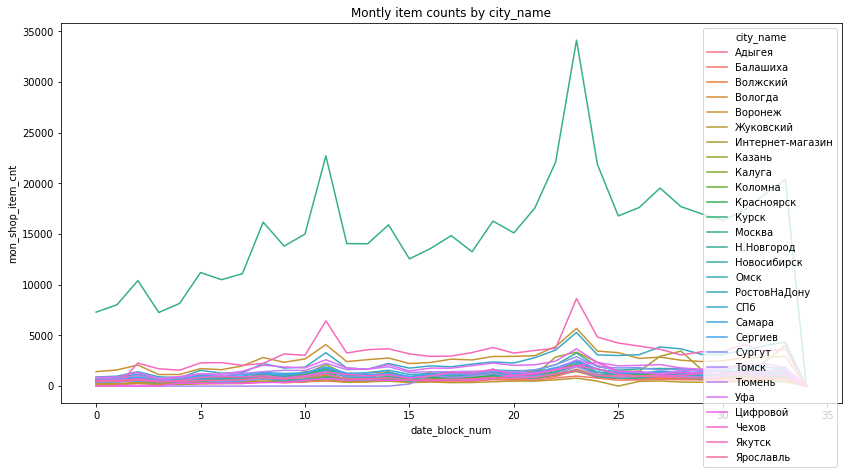

In [31]:
plt_df = train.groupby(
    ['date_block_num','city_name'],
    as_index=False
).sum()
plt.figure(figsize=(14, 7))
sns.lineplot(x='date_block_num',y='mon_shop_item_cnt',data=plt_df,hue='city_name')
plt.title('Montly item counts by city_name')

In [0]:
# ラグ特徴量の作成

In [0]:
# 月次売上数をクリップ
train['mon_shop_item_cnt'] = train['mon_shop_item_cnt'].clip(0,20)

In [0]:
# ラグ生成対象のカラム
lag_col_list = ['mon_shop_item_cnt','mon_shop_item_sales']
# ラグリスト(1ヶ月前、3ヶ月前、6ヶ月前、9ヶ月前、12ヶ月前)
lag_num_list = [1,3,6,9,12]
 
# shop_id*item_id*date_block_numでソート
train = train.sort_values(
    ['shop_id', 'item_id','date_block_num'],
    ascending=[True, True,True]
).reset_index(drop=True)
 
# ラグ特徴量の生成
for lag_col in lag_col_list:
    for lag in lag_num_list:
        set_col_name =  lag_col + '_' +  str(lag)
        df_lag = train[['shop_id', 'item_id','date_block_num',lag_col]].sort_values(
            ['shop_id', 'item_id','date_block_num'],
            ascending=[True, True,True]
        ).reset_index(drop=True).shift(lag).rename(columns={lag_col: set_col_name})
        train = pd.concat([train, df_lag[set_col_name]], axis=1)

In [0]:
# 欠損を0埋め
train = train.fillna(0)

In [0]:
## 予測モデルの構築

In [0]:
# ラグで最大12ヶ月前の売上数を使用するため
train_ = train[(train['date_block_num']<=33) & (train['date_block_num']>=12)].reset_index(drop=True)
test_ = train[train['date_block_num']==34].reset_index(drop=True)
 
# モデルに入力する特徴量とターゲット変数に分割
train_y = train_['mon_shop_item_cnt']
train_X = train_.drop(columns=['date_block_num','mon_shop_item_cnt', 'mon_shop_item_sales'])
test_X = test_.drop(columns=['date_block_num','mon_shop_item_cnt', 'mon_shop_item_sales'])

In [0]:
# string型の特徴量をLabel Encoding

In [0]:
from sklearn.preprocessing import LabelEncoder
obj_col_list = ['big_category_name','city_name']
for obj_col in obj_col_list:
    le = LabelEncoder()
    train_X[obj_col] = pd.DataFrame({obj_col:le.fit_transform(train_X[obj_col])})
    test_X[obj_col] = pd.DataFrame({obj_col:le.fit_transform(test_X[obj_col])})

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(train_X,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Text(0.5, 1.0, 'Importance of features')

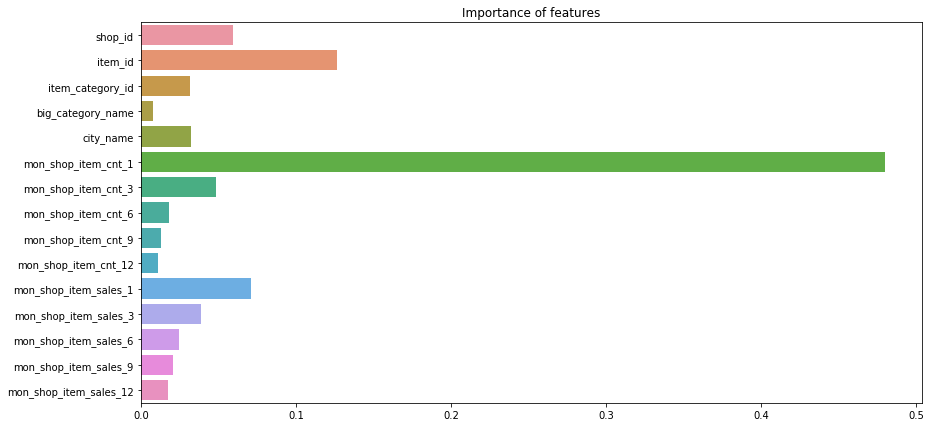

In [48]:
plt.figure(figsize=(14, 7))
sns.barplot(
    x=rfr.feature_importances_,
    y=train_X.columns.values
)
plt.title('Importance of features')

In [44]:
np.sqrt(
    np.mean(
        np.square(
            np.array(
                np.array(train_y) - rfr.predict(train_X)
            )
        )
    )
)

0.5885885751461897

In [49]:
test_y = rfr.predict(test_X)
test_y

ValueError: ignored